In [1]:
cd c:/Users/Alex/source/repos/ILDARSrevised

c:\Users\Alex\source\repos\ILDARSrevised


C:\Users\Alex\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
def shorten_names(algorithms_str):
  return algorithms_str \
    .replace("INVERSION","I\n\n") \
    .replace("GNOMONIC_PROJECTION","G\n\n") \
    .replace("DBSCAN","S\n\n") \
    .replace("ALL_PAIRS","A\n\n") \
    .replace("DISJOINT_PAIRS","D\n\n") \
    .replace("OVERLAPPING_PAIRS","O\n\n") \
    .replace("LARGEST_REFLECTION_CLUSTER","L\n\n") \
    .replace("NARROWEST_CLUSTER","N\n\n") \
    .replace("UNWEIGHTED_AVERAGE","U\n\n") \
    .replace("CLOSEST_LINES_EXTENDED","E\n\n") \
    .replace("CLOSEST_LINES","C\n\n") \
    .replace("MAP_TO_NORMAL_VECTOR","M\n\n") \
    .replace("REFLECTION_GEOMETRY","R\n\n") \
    .replace("WALL_DIRECTION","W\n\n") \
    .replace("-","")


def sort_csv_files(folder_path, column_index, key):
    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    sorted_files = []

    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r') as file:
            csv_data = csv.reader(file)
            data_list = list(csv_data)[1:]  # Exclude the header row
            column_values = [float(row[column_index]) for row in data_list]
            column_sort_value = key(column_values)
            sorted_files.append((file_name.split("/")[-1].split(".")[0], column_sort_value))

    sorted_files.sort(key=lambda item: item[1])

    return sorted_files

In [6]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


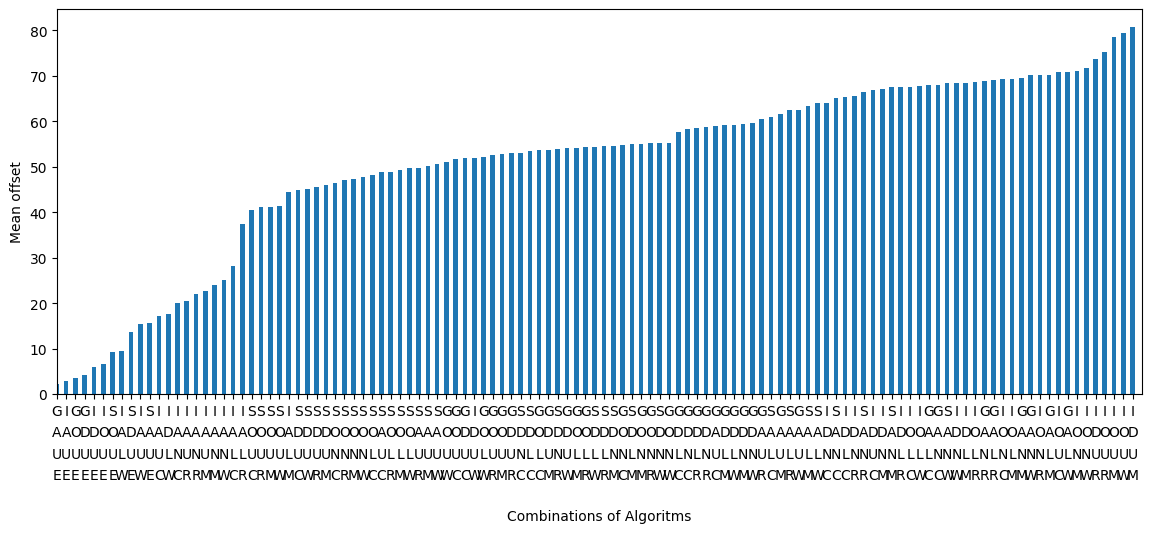

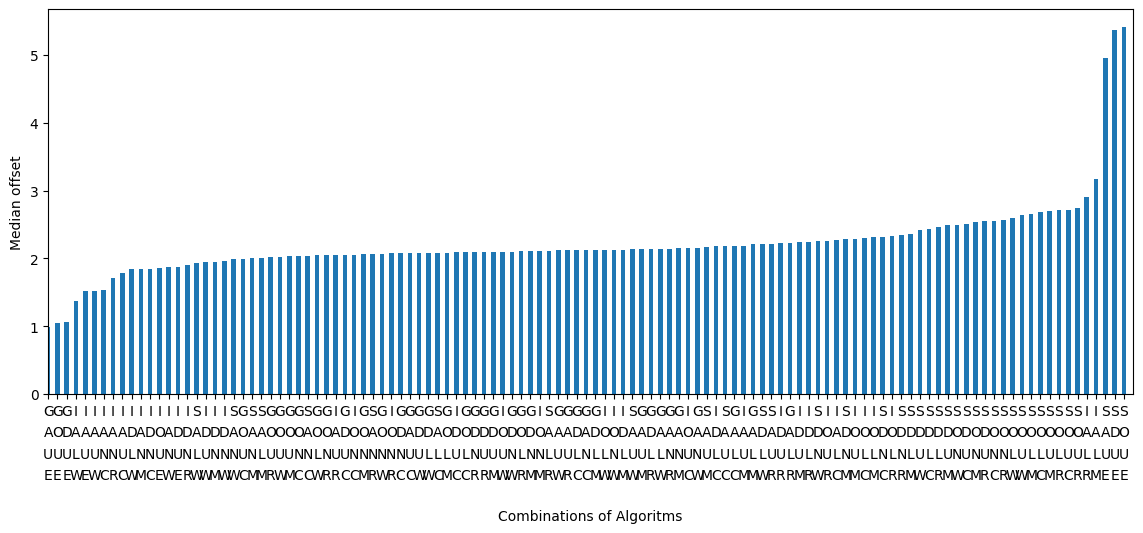

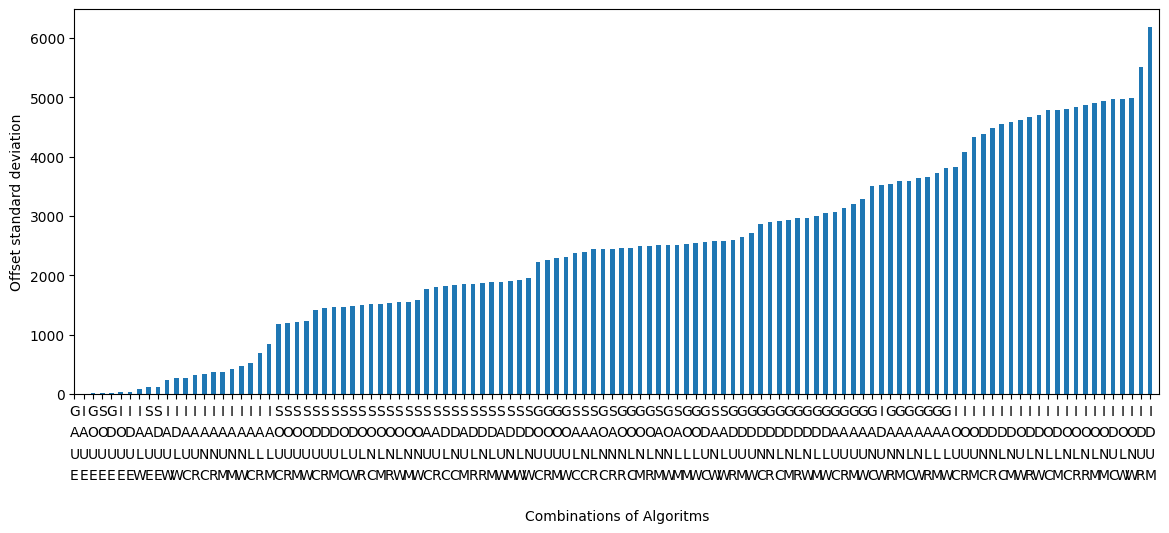

Sum of Means: 5973.83
Sum of Medians: 259.84
Sum of Standard Deviations: 284095.86


In [8]:
import os
import csv
import matplotlib.pyplot as plt
from pathlib import Path
from statistics import mean, median, stdev
import matplotlib.pyplot as plt
from tabulate import tabulate

def calculate_sums(sorted_files):
    values = [item[1] for item in sorted_files]
    sum_of_values = sum(values)

    return sum_of_values

# ... (rest of your code remains the same)

def plot_sorted_data(sorted_files, plotname, name_y_axis):
    #file_names = [item[0][0] for item in sorted_files3]
    file_names = [item[0] for item in sorted_files]
    std_values = [item[1] for item in sorted_files]

    plt.figure(figsize=(14, 5))
    x_pos = range(len(file_names))
    plt.bar(x_pos, std_values, width=0.5)
    plt.xticks(x_pos, [shorten_names(f) for f in file_names], linespacing=0.7)
    plt.xlabel('Combinations of Algoritms')
    plt.ylabel(name_y_axis)
    plt.xlim(0,len(file_names))
    plt.savefig("c:/Users/Alex/source/repos/ILDARSrevised/results/ImageResults/" + f'01-20{plotname}_500_5AdaptTo20_DBSCAN_EPS0-6_EPSMINUS0-15_AVGPlus0.svg', pad_inches=0, bbox_inches='tight')
    #plt.tight_layout()
    #plt.subplots_adjust(bottom=0.3)

    plt.show()

results_root = sorted(os.listdir('c:/Users/Alex/source/repos/ILDARSrevised/results'), reverse=True)
results_root = [f for f in results_root if not f.startswith("ImageResults")]
most_recent_folder = results_root[0]
#folder_path = f'/content/drive/MyDrive/ILDARSrevised/results/{most_recent_folder}/'
folder_path = f'c:/Users/Alex/source/repos/ILDARSrevised/results/500pyramidroom_5Dbscan_EPS0-6_EPSMINUS0-15_AvgMinlinesPlus0_AdaptTo20_01-20'
column_index = 3  # Replace with the index of the column to calculate the mean (0-based index)

sorted_by_mean = sort_csv_files(folder_path, column_index, mean)
plot_sorted_data(sorted_by_mean, "bymean", "Mean offset")

sorted_by_median = sort_csv_files(folder_path, column_index, median)
plot_sorted_data(sorted_by_median, "bymedian", "Median offset")

sorted_by_std_dev = sort_csv_files(folder_path, column_index, stdev)
plot_sorted_data(sorted_by_std_dev, "bystddev", "Offset standard deviation")

sum_of_means = calculate_sums(sorted_by_mean)
sum_of_medians = calculate_sums(sorted_by_median)
sum_of_std_devs = calculate_sums(sorted_by_std_dev)

print(f"Sum of Means: {sum_of_means:.2f}")
print(f"Sum of Medians: {sum_of_medians:.2f}")
print(f"Sum of Standard Deviations: {sum_of_std_devs:.2f}")